# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [1]:
## IMPORT YOUR LIBS HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for helping us with text
import string
# Regular Expression Library
import re

import nltk 
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olowu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olowu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olowu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates
df = df.dropna()
df = df.drop_duplicates()
print(df.shape)

(11314, 4)


In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
print(df['topic_category'].value_counts())

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64


# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.
def make_lower(text):
    return text.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
print(make_lower(test_string))


this is a sentence with lots of caps.


In [6]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
print(remove_punctuation(test_string))

This is a sentence 50 With lots of punctuation  other things


In [7]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords])

test_string = 'This is a sentence! With some different stopwords i have added in here.'
print(remove_stopwords(test_string))


This sentence ! With different stopwords added .


In [8]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stem_words(text):
    porter = PorterStemmer()
    return ' '.join([porter.stem(word) for word in word_tokenize(text)])

test_string = 'I played and started playing with players and we all love to play with plays'
print(stem_words(test_string))


i play and start play with player and we all love to play with play


In [9]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def pipeline(text):
    text = make_lower(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = stem_words(text)
    return text

test_string = 'I played and started playing with players and we all love to play with plays'
print(pipeline(test_string))

play start play player love play play


In [10]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['clean_text'] = df['message'].apply(pipeline)
print(df['clean_text'])

0        lerxstwamumdedu where thing subject car nntppo...
1        guykuocarsonuwashingtonedu guy kuo subject si ...
2        twillisececnpurdueedu thoma e willi subject pb...
3        jgreenamb joe green subject weitek p9000 organ...
4        jcmheadcfaharvardedu jonathan mcdowel subject ...
                               ...                        
11309    jimzisfeinfactorycom jim zisfein subject migra...
11310    ebodinpearltuftsedu subject screen death mac p...
11311    westesnetcomcom est subject mount cpu cooler v...
11312    stevehcrlgw steven collin subject sphere 4 poi...
11313    gunningccocaltechedu kevin j gun subject stole...
Name: clean_text, Length: 11314, dtype: object


In [11]:
df.head()

,id,message,topic,topic_category,clean_text
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [12]:
# 0. Define your `X` and `y` data. 
X = df['clean_text']
y = df['topic_category']


In [13]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_text = X_train
X_test_text = X_test

In [14]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [15]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)


TfidfVectorizer()

In [16]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)



In [17]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X_train.shape)



(9051, 102677)


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [18]:
# 1. Initalize an empty model. 
model = MultinomialNB()



In [19]:
# Fit our model with our training data.
model.fit(X_train, y_train)

MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [20]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

y_pred

array(['comp.windows.x', 'comp.sys.mac.hardware',
       'comp.sys.ibm.pc.hardware', ..., 'soc.religion.christian',
       'sci.space', 'rec.sport.baseball'], dtype='<U24')

In [21]:
# 2. Print the accuracy of the model. 
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.874503


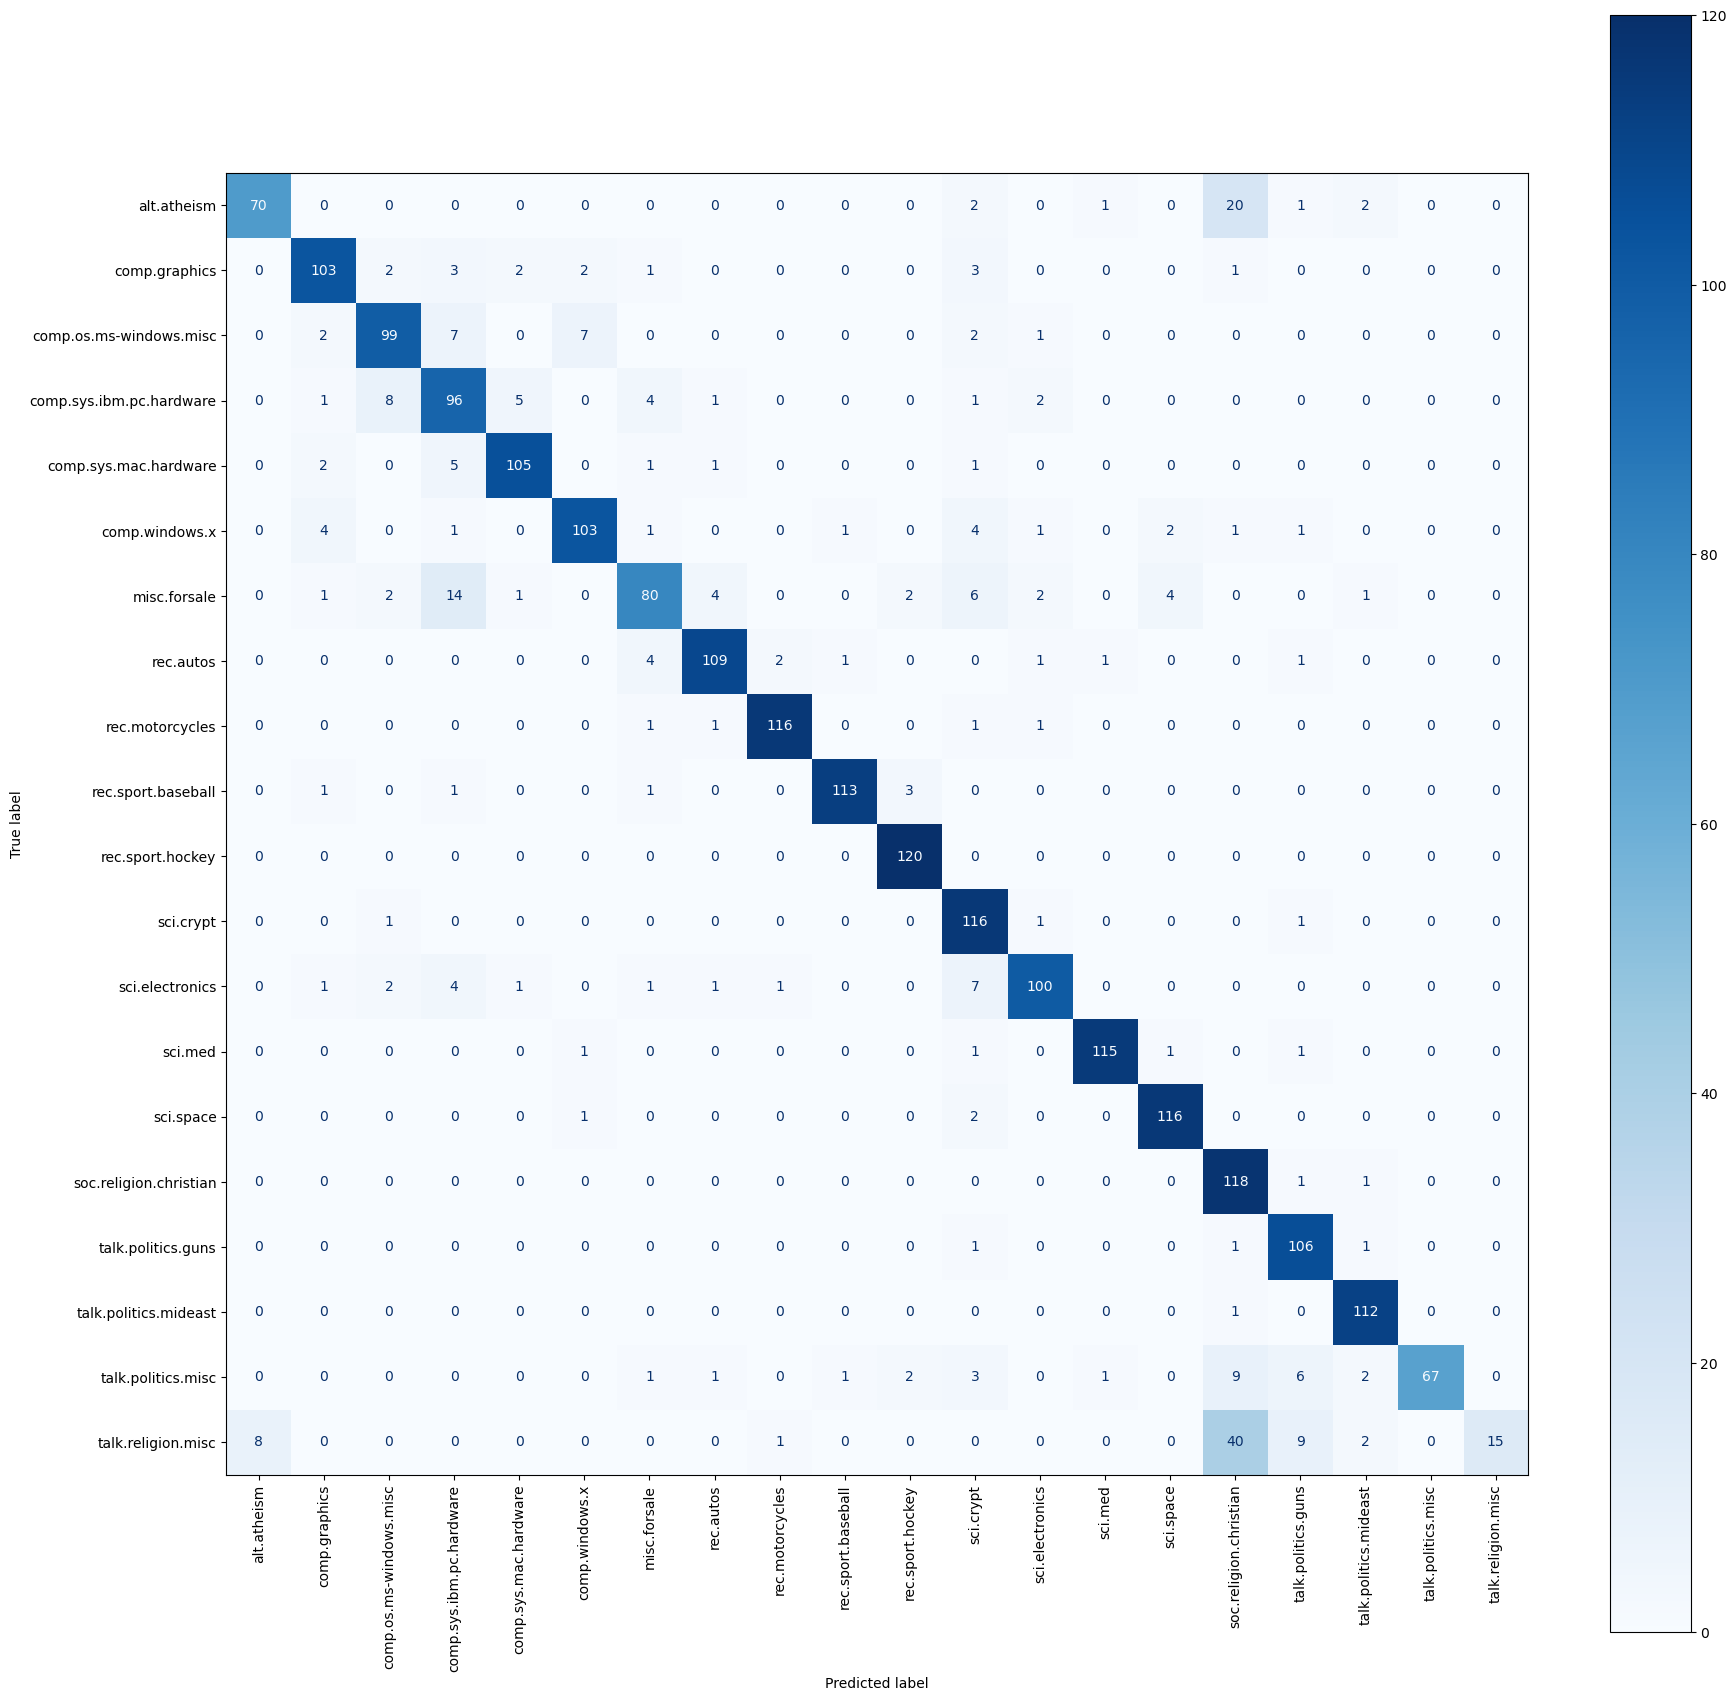

In [22]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')


In [23]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

             alt.atheism       0.90      0.73      0.80        96
           comp.graphics       0.90      0.88      0.89       117
 comp.os.ms-windows.misc       0.87      0.84      0.85       118
comp.sys.ibm.pc.hardware       0.73      0.81      0.77       118
   comp.sys.mac.hardware       0.92      0.91      0.92       115
          comp.windows.x       0.90      0.87      0.88       119
            misc.forsale       0.84      0.68      0.75       117
               rec.autos       0.92      0.92      0.92       119
         rec.motorcycles       0.97      0.97      0.97       120
      rec.sport.baseball       0.97      0.95      0.96       119
        rec.sport.hockey       0.94      1.00      0.97       120
               sci.crypt       0.77      0.97      0.86       119
         sci.electronics       0.92      0.85      0.88       118
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [24]:
# Write a new sentence that you think will be classified as talk.politics.guns. 
my_sentence = 'I think that the second amendment is very important and should be protected.'

# 1. Apply the text pipeline to your sentence
my_sentence = pipeline(my_sentence)
print(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`. 
y_pred = model.predict(X)

# 4. Print the prediction
print(y_pred)


think second amend import protect
['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [25]:
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [26]:
df = df.dropna()
df = df.drop_duplicates()
print(df.shape)


(86403, 3)


In [27]:
print(df['Party'].value_counts())

Republican    44362
Democrat      42041
Name: Party, dtype: int64


In [28]:
df['clean_tweet'] = df['Tweet'].apply(pipeline)
df.head()

,Party,Handle,Tweet,clean_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senat dem vote savetheinternet proud sup...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resid alta vista teac...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto note hurrican maria...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolici meet repdarrensoto thank take ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurrican season start june 1st pu...


In [29]:
X = df['clean_tweet']
y = df['Party']

print(X.shape, y.shape)

(86403,) (86403,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_text = X_train
X_test_text = X_test


In [31]:
vectorizer = TfidfVectorizer()

In [32]:
vectorizer.fit(X_train)


TfidfVectorizer()

In [33]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [34]:
print(X_train.shape)

(69122, 104105)


In [35]:
model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array(['Republican', 'Republican', 'Republican', ..., 'Republican',
       'Republican', 'Republican'], dtype='<U10')

Model Accuracy: 0.810254


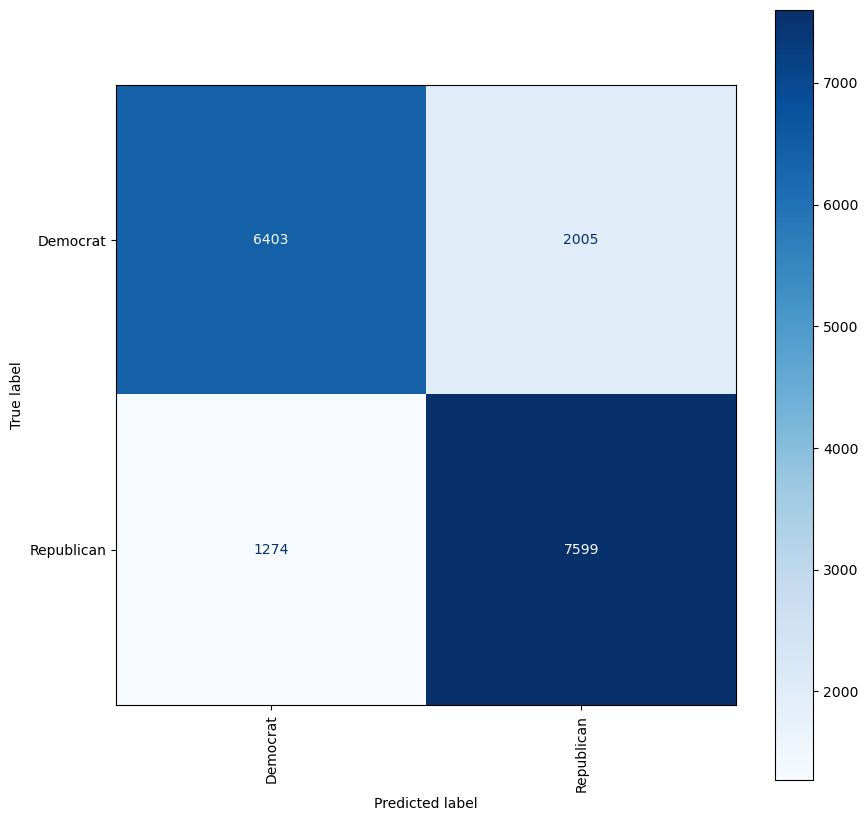

In [36]:
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Model Accuracy: %f" % accuracy)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Democrat       0.83      0.76      0.80      8408
  Republican       0.79      0.86      0.82      8873

    accuracy                           0.81     17281
   macro avg       0.81      0.81      0.81     17281
weighted avg       0.81      0.81      0.81     17281



In [38]:
my_sentence = 'I think that the second amendment is very important and should be protected.'

my_sentence = pipeline(my_sentence)
print(my_sentence)
X = vectorizer.transform([my_sentence])

y_pred = model.predict(X)

print(y_pred)

think second amend import protect
['Republican']
